<a href="https://colab.research.google.com/github/John-Akech/Economic-Index-Price-Prediction/blob/master/economic_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Load dataset
df_index = pd.read_csv('/content/economic_index.csv')

In [67]:
#Check the rows and columns
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [68]:
# Drop unnecessary column(s)
df_index.drop(columns=['Unnamed: 0','year', 'month'], axis=1, inplace=True)

In [69]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [70]:
#Checkl the size
df_index.shape

(24, 3)

In [71]:
#Check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


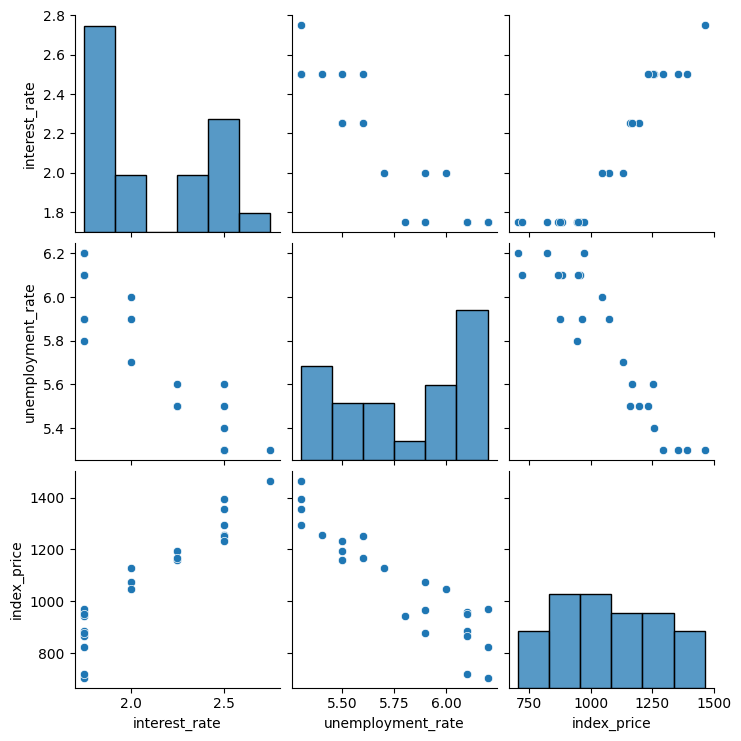

In [72]:
# Visualization
sns.pairplot(df_index)

In [73]:
#Check the correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


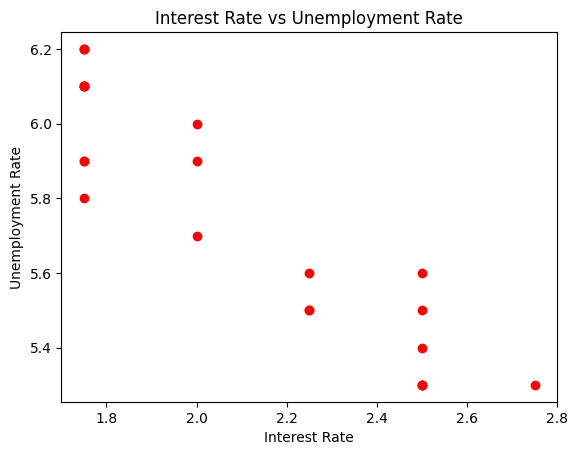

In [74]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')
plt.title('Interest Rate vs Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [75]:
# Get independent and dependent features
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [76]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [77]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [78]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

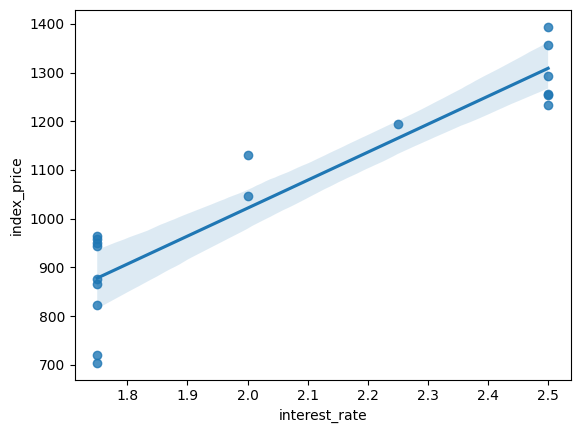

In [79]:
#Regression plot for interest
sns.regplot(x=x_train['interest_rate'], y=y_train, data=df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

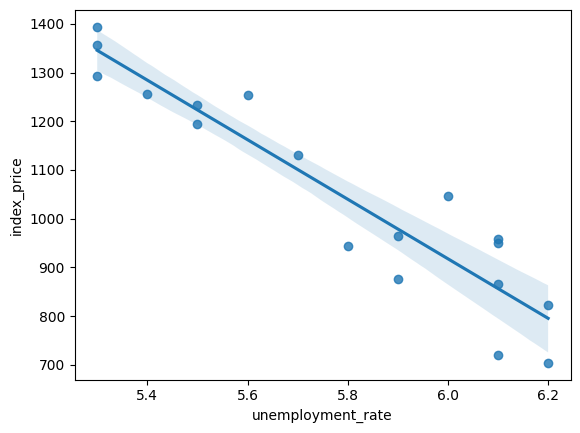

In [80]:
# Regression plot for unemployment
sns.regplot(x=x_train['unemployment_rate'], y=y_train, data=df_index)

In [81]:
#Standadization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [82]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [83]:
#Build model/fit
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [84]:
# cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, x_train, y_train,scoring='neg_mean_squared_error', cv=3)

In [85]:
# Mean score
np.mean(score)

-5914.828180162386

In [86]:
# Prediction
y_pred = model.predict(x_test)

In [87]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [88]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
print('Adjusted R2:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MAE: 59.935781523235484
MSE: 5793.762887712569
RMSE: 76.11677139574805
R2 Score: 0.8278978091457145
Adjusted R2: 0.7131630152428576


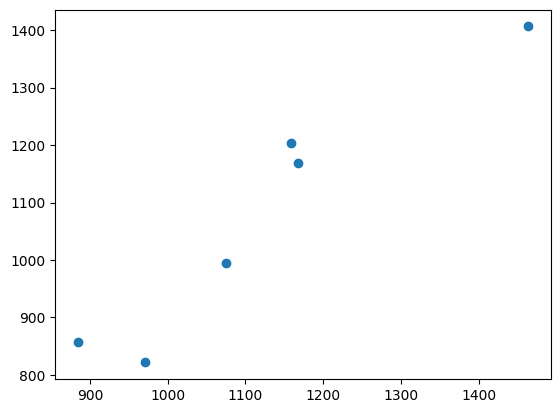

In [89]:
# Assumptions
plt.scatter(y_test, y_pred)

In [90]:
residuals = y_test - y_pred

In [91]:
residuals

,index_price
8,-45.227704
16,149.349481
0,57.486996
18,26.291104
11,80.090077
9,-1.169327


<Axes: xlabel='index_price', ylabel='Density'>

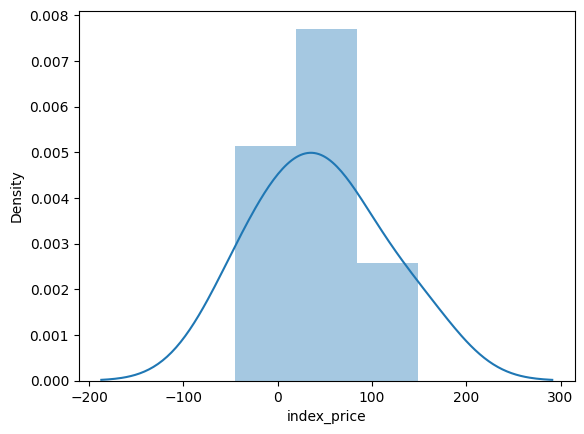

In [92]:
## Plot residuals
sns.distplot(residuals, kde=True)

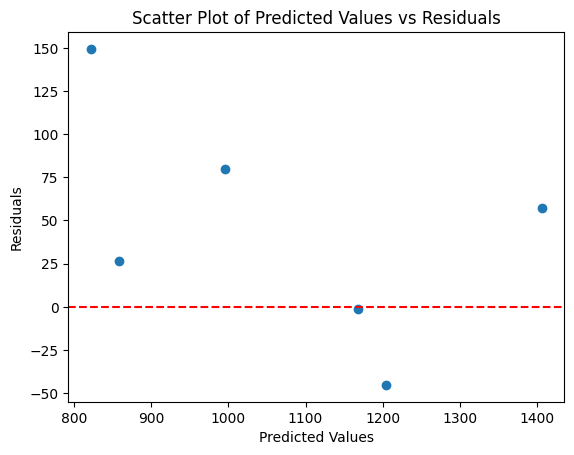

In [93]:
# Create a scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Predicted Values vs Residuals')
plt.show()

In [94]:
# OLS linear regression
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm).fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.50e-08
Time:                        12:56:05   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.000    1017.336    1089.553
x1            88.2728     42.263      2.089      0.054      -1.810     178.355
x2          -116.2572     42.263     -2.751      0.015    -206.340     -26.175
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
print(model.params)

const    1053.444444
x1         88.272755
x2       -116.257161
dtype: float64
